In [1]:
import cv2
image_path =  r"D:\DATA\Patterns\Patt_2023-11-13\Images\mask_output.tif"
# read the image
img = cv2.imread(image_path)
# normalize the image to 0 to max 255
img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
# show the image
cv2.imshow('image', img)





: 

In [8]:
import numpy as np
from PIL import Image

def load_binary_image(image_path):
    """ Load a binary image and return it as a numpy array """
    with Image.open(image_path) as img:
        #print((np.unique(img)))
        return np.array(img)

def sum_images_by_group(cell_group_mapping, image_folder):
    """ Sum binary images according to their group IDs """
    group_sums = {}
    
    for cell_id, group_ids in cell_group_mapping.items():
        image_path = f"{image_folder}/{cell_id}.bmp"  # Adjusted path format
        cell_image = load_binary_image(image_path)

        for group_id in group_ids:
            if group_id in group_sums:
                group_sums[group_id] += cell_image
            else:
                group_sums[group_id] = cell_image.copy()

    return group_sums

# Example usage
cell_group_mapping =  {8: [1], 17: [1], 20: [1], 14: [1], 21: [2], 24: [2], 16: [2], 5: [2], 3: [3], 2: [3], 13: [3], 6: [3]}  # cell number: group number
image_folder = 'D:\DATA\Patterns\Patt_2023-11-14\DMD'  # Replace with your images folder path
grouped_images = sum_images_by_group(cell_group_mapping, image_folder)

# To save or further process the grouped_images, additional code is needed


[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]


<class 'dict'>
3


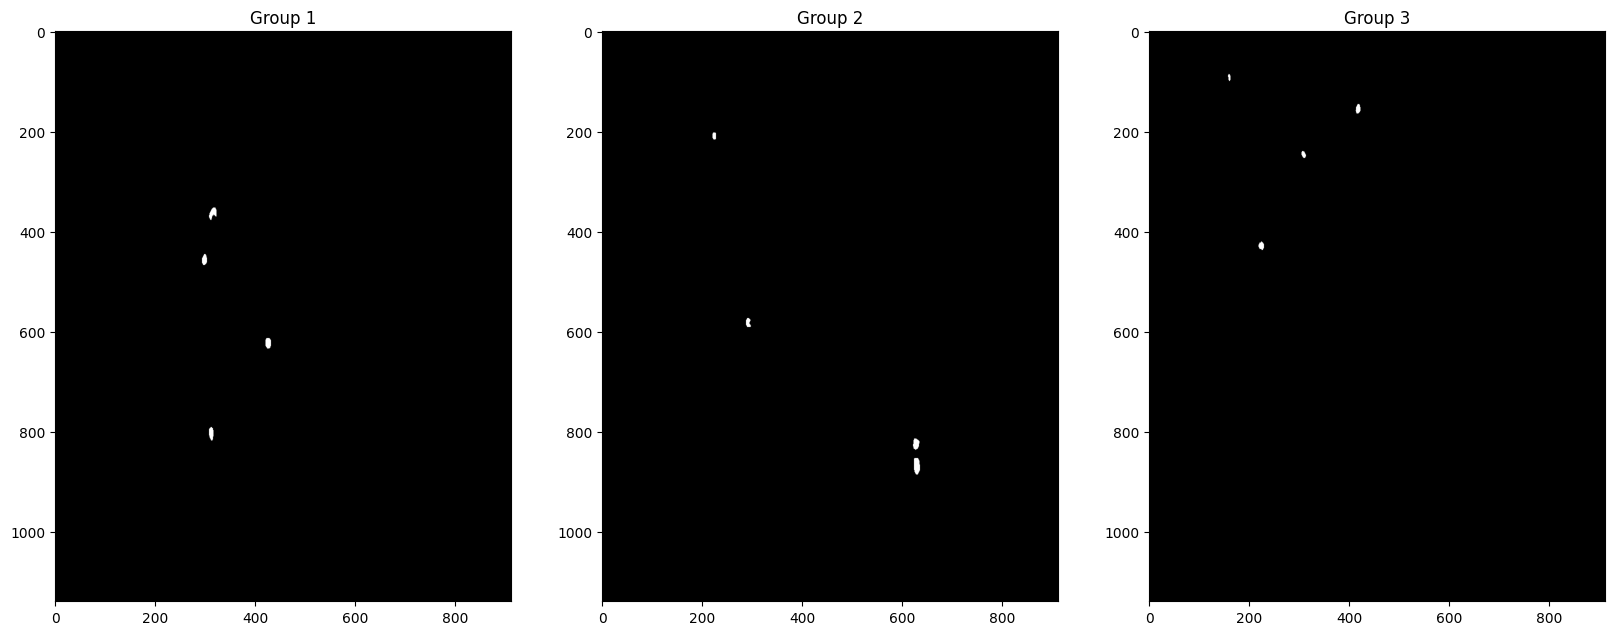

In [3]:
print(type(grouped_images))
print(len(grouped_images))

# plot the images from group_sums
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(grouped_images), figsize=(20, 20))
for i, (group_id, image) in enumerate(grouped_images.items()):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Group {group_id}")
plt.show()





In [7]:
groups = {1:[1,3,7], 2:[2,4,6], 3:[5,8,9]}
# get the values of the dictionary
values = groups.values()
print(values)
# get the values of the second group
print(groups[1])
groups[1].append(10)
print(groups[1])
groups[4] = [11,12,13]
print(groups)
# change the senocnd value of the fourth group
groups[4][1] = 14 # index starts from 0
print(groups)



dict_values([[1, 3, 7], [2, 4, 6], [5, 8, 9]])
[1, 3, 7]
[1, 3, 7, 10]
{1: [1, 3, 7, 10], 2: [2, 4, 6], 3: [5, 8, 9], 4: [11, 12, 13]}
{1: [1, 3, 7, 10], 2: [2, 4, 6], 3: [5, 8, 9], 4: [11, 14, 13]}


In [3]:
import pandas as pd

# Example: DataFrame with stages as rows and parameters as columns
data = {
    'Header1': [True, 3, 0.6],
    'Header2': [False, 10, 4],
    # Add more headers and corresponding parameters
}

df = pd.DataFrame(data)
print(df.to_string())
#df.to_csv('experiment_data.csv', index=False)
df_transposed = df.T

# Print the transposed DataFrame
print(df_transposed.to_string())


  Header1 Header2
0    True   False
1       3      10
2     0.6       4
             0   1    2
Header1   True   3  0.6
Header2  False  10    4


In [7]:
import pandas as pd
# create empty dataframe
df1 = pd.DataFrame()

a =  {

 
            "stimulation_type": '3',
            "random_frequency": '2',
            "jitter": True,
            "group_frequency": '1',
            "group_size": '3',
            "stimulation_time": '4',
            # Other parameters...   
        }
print(a)
# Convert the dictionary to a DataFrame
df = pd.DataFrame([a])
# Append the DataFrame to the empty DataFrame
df1 = pd.concat([df1, df], ignore_index=True)
print(df1.to_string())


{'stimulation_type': '3', 'random_frequency': '2', 'jitter': True, 'group_frequency': '1', 'group_size': '3', 'stimulation_time': '4'}
  stimulation_type random_frequency  jitter group_frequency group_size stimulation_time
0                3                2    True               1          3                4


In [11]:

from tkinter import simpledialog
# Prompt the user for input
user_input = simpledialog.askstring("Input", "Please enter your text:")
# Print or use the input
print(user_input)




hi mernsdfng


(1140, 912)
6
4
5
4
[[22, 24, 2, 13, 9, 31], [36, 26, 29, 20, 30, 4], [34, 33, 32, 18, 6, 8], [1, 35, 10, 11, 14, 23], [3], [5], [7], [12], [15], [16], [17], [19], [21], [25], [27], [28]]
[[1, 14, 36, 32, 29], [25, 28, 23, 5, 3], [20, 16, 26, 30, 13], [34, 19, 33, 8, 12], [2], [4], [6], [7], [9], [10], [11], [15], [17], [18], [21], [22], [24], [27], [31], [35]]


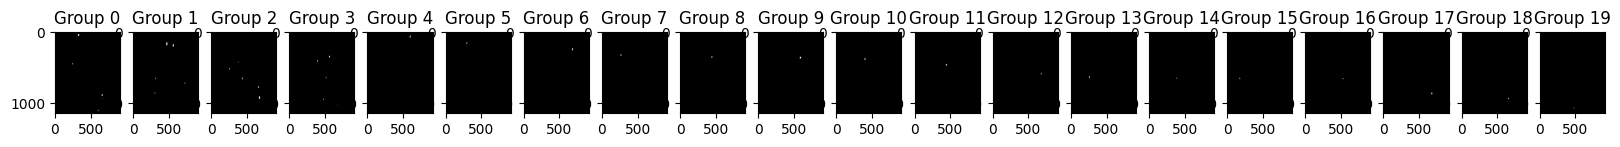

In [41]:
# load csv file as a dataframe from G:\My Drive\Research\Projects\Theory of cortical mind\Object representation\Software\Python\QT_GUI\MainGUI\Protocols\20231123_111456_T_protocol.csv
import pandas as pd
import os
import glob
import cv2
import random






def create_random_groups(numberCells, groupsNumber, group_size):
    # Check if the total number of required group members exceeds the numberCells
    if groupsNumber * group_size > numberCells:
        raise ValueError("Not enough cells to create the required number of groups without repeats")

    all_cells = list(range(1, numberCells + 1))
    groups = []

    for _ in range(groupsNumber):
        group = random.sample(all_cells, group_size)
        groups.append(group)
        # Remove the selected cells to ensure no repeats
        for cell in group:
            all_cells.remove(cell)

    # create a list of the remaining cells
    remaining_cells = [[item] for item in all_cells]

    return groups, remaining_cells


# set the path to the csv file
csv_path = r'G:\My Drive\Research\Projects\Theory of cortical mind\Object representation\Software\Python\QT_GUI\MainGUI\Protocols\20231123_163058_r_protocol.csv'
# read the csv file as a dataframe
df = pd.read_csv(csv_path)
headers = list(df.columns)
data = df.values.tolist()
#print(headers)
#print("number of stages", len(df))
#print(data)


# load the DMD images from D:\DATA\Patterns\Patt_2023-11-23\DMD into a list
# set the path to the DMD images
image_folder = r'D:\DATA\Patterns\Patt_2023-11-23\DMD'
# get the list of images
images = glob.glob(os.path.join(image_folder, '*.bmp'))
# sort the images by name
images.sort(key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))

# load the images into a list
images_list = []
for image in images:
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    images_list.append(img)

number_cells = len(images_list)
print(images_list[0].shape)
# run over the dataframe rows and group the images according to the group size and the number of groups
# loop over the dataframe rows and create random groups according to the group size and the number of groups

sequences = []
for index, row in df.iterrows():
    sequence = []
    #print(index)
    # get the group size
    group_size = int(row['groupSize'])
    print(group_size)
    # get the number of groups
    groups_number = int(row['groupsNumber'])
    print(groups_number)
    # get the number of cells
    
    # create random groups

    groups, remainingCells = create_random_groups(number_cells, groups_number, group_size)
    sequence = groups + remainingCells
    sequences.append(sequence)

print(sequences[0])
print(sequences[1])

# create a list of the images according to the sequences. If group size is larger than 1, the images are summed
sequences_images = []
for stage in sequences:
    sequence_images = []
    for group in stage: # group is a list of cells either of size 1 or larger
        group_images = []
        for cell in group:
            group_images.append(images_list[cell - 1])
        # sum the images in the group
        group_sum = sum(group_images)
        sequence_images.append(group_sum)
    sequences_images.append(sequence_images)
    
# plot the images from group_sums
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(sequences_images[1]), figsize=(20, 20))
for i, image in enumerate(sequences_images[1]):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Group {i}") 
plt.show()


In [42]:
import pandas as pd

# Example DataFrame
data = {'Column1': [1, 2, 3], 'Column2': ['a', 'b', 'c']}
df = pd.DataFrame(data)

# Using iterrows to iterate through the DataFrame
for index, row in df.iterrows():
    print(f"Index: {index}, Column1: {row['Column1']}, Column2: {row['Column2']}")

Index: 0, Column1: 1, Column2: a
Index: 1, Column1: 2, Column2: b
Index: 2, Column1: 3, Column2: c


In [16]:
original_list = [1, 2, 3, 4, 5]  # Example original list
individual_lists = [[item] for item in original_list]
print(individual_lists)


[[1], [2], [3], [4], [5]]


In [5]:
import threading
import time
import sys

# Spinner
def spinner():
    spinner_chars = "|/-\\"
    while True:
        for char in spinner_chars:
            sys.stdout.write(char)
            sys.stdout.flush()
            sys.stdout.write('\b')
            if stop_spinner:
                return
            time.sleep(0.1)

# Long task
def long_task():
    # Simulate a long task
    time.sleep(5)

# Start spinner
stop_spinner = False
spinner_thread = threading.Thread(target=spinner)
spinner_thread.start()

# Run long task
long_task()

# Stop spinner
stop_spinner = True
spinner_thread.join()

print("Task completed.")

Task completed.


In [14]:
import pandas as pd
import random

      

# Data
data = {
    "stimType": ["Random"],
    "randFreq": [1],
    "jitter": [False],
    "groupFreq": [0.5],
    "groupSize": [4],
    "groupsNumber": [3],
    "stimTime": [2]
}

df = pd.DataFrame(data)
numberCells = 20

sequences = []
for index, row in df.iterrows():    

    sequence = []
    #print("index:", index)
    # get the group size
    groupSize = int(row['groupSize'])
    print("groupSize:", groupSize)
    # get the number of groups
    groupsNumber = int(row['groupsNumber'])
    print("groupsNumber:", groupsNumber)

    if groupsNumber * groupSize > numberCells:
        raise ValueError("Not enough cells to create the required number of groups without repeats")

    all_cells = list(range(1, numberCells + 1))
    groups = []

    for _ in range(groupsNumber):
        group = random.sample(all_cells, groupSize)
        groups.append(group)
        # Remove the selected cells to ensure no repeats
        for cell in group:
            all_cells.remove(cell)

        # create seperate list of each of the remaining cells
    remaining_cells = [[item] for item in all_cells]

    sequence = groups + remaining_cells # indices of the cells to be stimulated in a sequence
    sequences.append(sequence) # each stage has one list in sequences

print(sequences[0])


groupSize: 4
groupsNumber: 3
[[17, 7, 8, 2], [19, 6, 10, 13], [12, 18, 5, 20], [1], [3], [4], [9], [11], [14], [15], [16]]
